In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import os
from sklearn.cluster import KMeans

In [2]:
buoy = pd.read_csv("/Users/matthewq/Geol_599/week9/Waves_2023.txt", sep='\s+') 
buoy_use = buoy[['WVHT', 'DPD', 'APD', 'MWD', 'WTMP']].copy()
buoy_use_na = buoy_use.replace(99,np.NaN) #convert any 99 values to NaN
buoy_use_na = buoy_use_na.replace(999,np.NaN) #convert any 999 values to NaN
buoy_use_nona = buoy_use_na.dropna() #drop any NaN values, which now contains 99 and 999 values
buoy_use_nona.describe()

,WVHT,DPD,APD,MWD,WTMP
count,17276.000000,17276.000000,17276.000000,17276.000000,17276.000000
mean,1.032525,12.116640,6.765029,234.157965,17.195294
std,0.526637,3.664928,1.852623,46.260000,2.564729
min,0.330000,2.860000,3.420000,10.000000,11.800000
25%,0.730000,9.090000,5.500000,179.000000,14.600000
50%,0.880000,12.500000,6.360000,263.000000,17.500000
75%,1.140000,14.290000,7.550000,271.000000,19.400000
max,5.130000,25.000000,15.790000,306.000000,23.900000


In [3]:
pca = PCA(n_components=5) #PCA with 5 components because dataset we are using has 5 variables
pca.fit(buoy_use_nona)

PCA(n_components=5)

<Axes: xlabel='PC1', ylabel='PC2'>

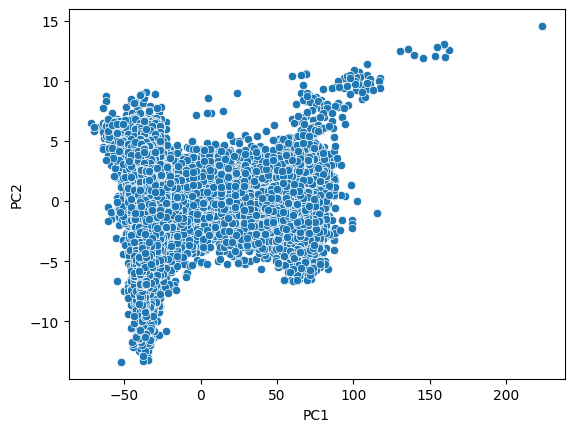

In [6]:
#1:
plotData = pca.transform(buoy_use_nona) #transforms data onto your different principal components
componentsDf = pd.DataFrame(data = plotData, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']) #converts plotData into a dataframe with colums labeled for each PC
sns.scatterplot(data=componentsDf, x="PC1", y="PC2")

In [10]:
clusters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [14]:
error = pd.DataFrame(columns=['clusters', 'Inertia']) #inertia = Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided. (error metric)

for i in clusters:
    kmeans = KMeans(n_clusters=i, n_init='auto').fit(plotData)
    row = [i, kmeans.inertia_]
    #adds rows of wanted variables to empty error dataframe
    error.loc[len(error)] = row
    print(i, kmeans.inertia_)

1 37378033.17465844
2 3547330.001728718
3 1998944.7782922145
4 1470726.0042437096
5 1206557.0375126675
6 1001710.3200070548
7 879122.4828455189
8 754614.0004879939
9 667359.5145883171
10 608676.2097937162


<Axes: xlabel='clusters', ylabel='Inertia'>

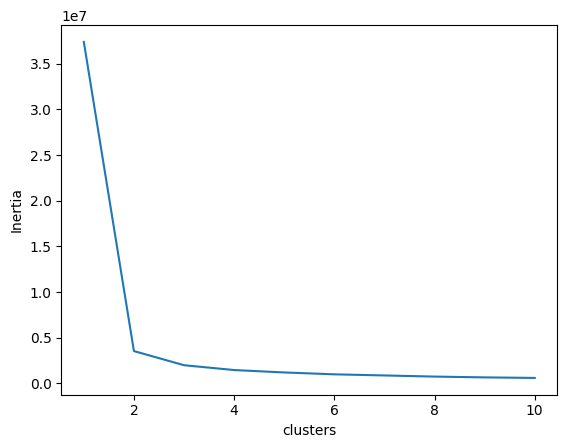

In [15]:
#2:
sns.lineplot(data=error, x="clusters", y="Inertia")

#3:
Two clusters is optimal for this data set as there is little decrease in the error metric when employing more than two clusters.

In [18]:
kmeans = KMeans(n_clusters=2, n_init='auto').fit(plotData)
centers = kmeans.cluster_centers_
centers

array([[ 5.94828573e+01,  2.03677232e-02,  2.94134651e-02,
        -2.88247175e-02,  2.71270228e-03],
       [-3.29212289e+01, -1.12726676e-02, -1.62791006e-02,
         1.59532539e-02, -1.50136521e-03]])

In [19]:
centersDF = pd.DataFrame(data = centers, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

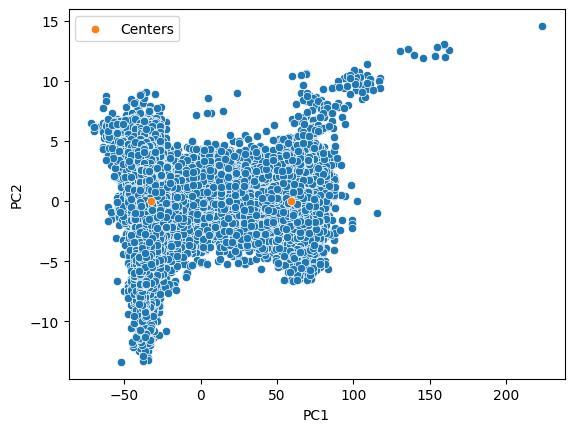

In [23]:
#4
buoy_PC = sns.scatterplot(data=componentsDf, x="PC1", y="PC2")
buoy_PC = sns.scatterplot(data=centersDF, x="PC1", y="PC2", label = 'Centers')

#5
Yes, visually these cluster centers make sense to me as they look centered on to major clusters of the data along PC1.
It also makes sense that the centers are at nearly the same point on PC2, but far apart on PC1 as PC1 contains the vast majority of the variability in the dataset.